In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import numpy as np
import seaborn as sns
import datetime as dt
import cufflinks as cf
from IPython.display import display, HTML
from sodapy import Socrata
import streamlit as st
import mysql.connector
import datetime
import time
from googletrans import Translator

from sqlalchemy import create_engine
from googletrans import Translator
from pathlib import Path
import csv
import os

In [2]:
def calidaDato (data):
    df = data
    calidad = []
    mascara = df.isna().sum()
    for i in range(0,len(mascara)):
        p = (df.shape[0]- mascara[i]) / df.shape[0]
        calidad.append([mascara.index[i], round((p*100),2)])
   
    calidad = pd.DataFrame(calidad)
    calidad.rename(columns={0:'Columna', 1: 'Calida %'}, inplace=True)
    
    return calidad

In [3]:
def renombracol(data):
    data = data
    translator = Translator()
    for i in data.columns:
        b = i.replace('_',' ')
        data.rename(columns={i:b}, inplace=True)
        data.rename(columns={'Entity':'Country'}, inplace=True)
        
    for i in data.columns:
        data.rename(columns={i:translator.translate(i, dest="es").text.title()}, inplace=True)
        
    return data

In [4]:
data_2 = pd.read_csv('c:\\Users\\x\\OneDrive\\Escritorio\\Agus\\Henry DATA 02\\emissionsmap\\documentation\\data\\electricity-prod-source-stacked.csv', sep=',', low_memory=False, encoding='utf-8')

In [5]:
data_2 = renombracol(data_2)

In [6]:
data_2

,País,Código,Año,Electricidad Del Carbón (Twh),Electricidad A Partir De Gas (Twh),Electricidad De Hidro (Twh),Otras Renovables Incluida La Bioenergía (Twh),Electricidad Solar (Twh),Electricidad Del Petróleo (Twh),Electricidad Del Viento (Twh),Electricidad De Origen Nuclear (Twh)
0,Afghanistan,AFG,2000,0.00,0.0,0.31,0.00,0.00,0.16,0.0,0.0
1,Afghanistan,AFG,2001,0.00,0.0,0.50,0.00,0.00,0.09,0.0,0.0
2,Afghanistan,AFG,2002,0.00,0.0,0.56,0.00,0.00,0.13,0.0,0.0
3,Afghanistan,AFG,2003,0.00,0.0,0.63,0.00,0.00,0.31,0.0,0.0
4,Afghanistan,AFG,2004,0.00,0.0,0.56,0.00,0.00,0.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9170,Zimbabwe,ZWE,2016,3.46,0.0,2.95,0.36,0.01,0.04,0.0,0.0
9171,Zimbabwe,ZWE,2017,3.02,0.0,3.93,0.32,0.01,0.03,0.0,0.0
9172,Zimbabwe,ZWE,2018,3.69,0.0,5.00,0.39,0.01,0.04,0.0,0.0
9173,Zimbabwe,ZWE,2019,3.62,0.0,7.26,0.38,0.01,0.04,0.0,0.0


In [7]:
calidad = calidaDato(data_2)

,Columna,Calida %
0,País,100.00
1,Código,78.28
2,Año,100.00
3,Electricidad Del Carbón (Twh),70.16
4,Electricidad A Partir De Gas (Twh),70.17
5,Electricidad De Hidro (Twh),99.95
6,Otras Renovables Incluida La Bioenergía (Twh),96.99
7,Electricidad Solar (Twh),97.43
8,Electricidad Del Petróleo (Twh),70.17
9,Electricidad Del Viento (Twh),97.58


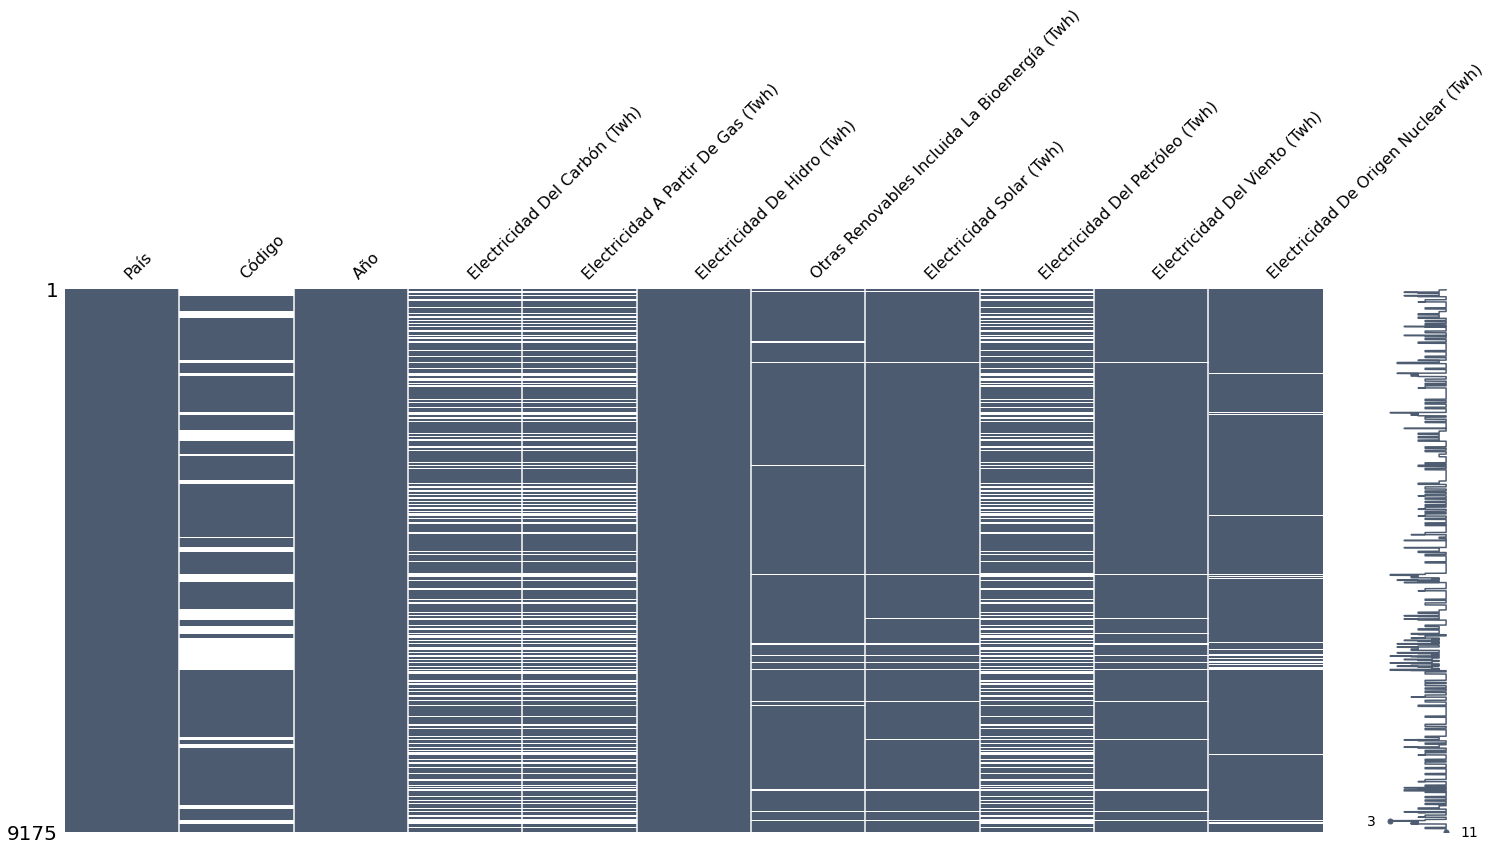

In [8]:
import missingno as msno
msno.matrix(data_2,color=(0.3,0.36,0.44))

calidad

In [9]:
import hashlib
def hash(df,colum):
    nom = "Id" + colum
    if df[colum].dtype == 'int64':
        df[colum] = df[colum].astype(str)
        df[nom] = df[colum].apply(lambda x: hashlib.md5(x.encode()).hexdigest())
        df[colum] = df[colum].astype(int)
    else:
        df[nom] = df[colum].apply(lambda x: hashlib.md5(x.encode()).hexdigest())

In [10]:
hash(data_2, 'País')

In [11]:
from operator import index


def subircsv(nomcarpeta, nomarchivo, extencion, df):
    df = data_2
    filepath = Path(nomcarpeta + '/' + nomarchivo +'.' + extencion)  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    df.to_csv(filepath, index=False)  

In [12]:
subircsv('TablasNormal','electricity-prod-source-stacked', 'csv', data_2)

In [13]:
data_2

,País,Código,Año,Electricidad Del Carbón (Twh),Electricidad A Partir De Gas (Twh),Electricidad De Hidro (Twh),Otras Renovables Incluida La Bioenergía (Twh),Electricidad Solar (Twh),Electricidad Del Petróleo (Twh),Electricidad Del Viento (Twh),Electricidad De Origen Nuclear (Twh),IdPaís
0,Afghanistan,AFG,2000,0.00,0.0,0.31,0.00,0.00,0.16,0.0,0.0,6e9767f4f15357401b148b9a8ced14ef
1,Afghanistan,AFG,2001,0.00,0.0,0.50,0.00,0.00,0.09,0.0,0.0,6e9767f4f15357401b148b9a8ced14ef
2,Afghanistan,AFG,2002,0.00,0.0,0.56,0.00,0.00,0.13,0.0,0.0,6e9767f4f15357401b148b9a8ced14ef
3,Afghanistan,AFG,2003,0.00,0.0,0.63,0.00,0.00,0.31,0.0,0.0,6e9767f4f15357401b148b9a8ced14ef
4,Afghanistan,AFG,2004,0.00,0.0,0.56,0.00,0.00,0.33,0.0,0.0,6e9767f4f15357401b148b9a8ced14ef
...,...,...,...,...,...,...,...,...,...,...,...,...
9170,Zimbabwe,ZWE,2016,3.46,0.0,2.95,0.36,0.01,0.04,0.0,0.0,9d5116a2451bc98c2b46b93acbc1b4f0
9171,Zimbabwe,ZWE,2017,3.02,0.0,3.93,0.32,0.01,0.03,0.0,0.0,9d5116a2451bc98c2b46b93acbc1b4f0
9172,Zimbabwe,ZWE,2018,3.69,0.0,5.00,0.39,0.01,0.04,0.0,0.0,9d5116a2451bc98c2b46b93acbc1b4f0
9173,Zimbabwe,ZWE,2019,3.62,0.0,7.26,0.38,0.01,0.04,0.0,0.0,9d5116a2451bc98c2b46b93acbc1b4f0
